### **D2APR: Aprendizado de Máquina e Reconhecimento de Padrões** (IFSP, Campinas) <br/>
**Prof**: Samuel Martins (Samuka) <br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>. <br/><br/>

#### Custom CSS style

In [1]:
%%html
<style>
.dashed-box {
    border: 1px dashed black !important;
#    font-size: var(--jp-content-font-size1) !important;
}

.dashed-box table {

}

.dashed-box tr {
    background-color: white !important;
}
        
.alt-tab {
    background-color: black;
    color: #ffc351;
    padding: 4px;
    font-size: 1em;
    font-weight: bold;
    font-family: monospace;
}
// add your CSS styling here
</style>

<span style='font-size: 2.5em'><b>California Housing 🏡</b></span><br/>
<span style='font-size: 1.5em'>Predict the median housing price in California districts</span>

<span style="background-color: #ffc351; padding: 4px; font-size: 1em;"><b>Sprint #3</b></span>

<img src="./imgs/california-flag.png" width=300/>

---



## Before starting this notebook
This jupyter notebook is designed for **experimental and teaching purposes**. <br/>
Although it is (relatively) well organized, it aims at solving the _target problem_ by evaluating (and documenting) _different solutions_ for somes steps of the **machine learning pipeline** — see the ***Machine Learning Project Checklist by xavecoding***. <br/>
We tried to make this notebook as literally a _notebook_. Thus, it contains notes, drafts, comments, etc.<br/>

For teaching purposes, some parts of the notebook may be _overcommented_. Moreover, to simulate a real development scenario, we will divide our solution and experiments into **"sprints"** in which each sprint has some goals (e.g., perform _feature selection_, train more ML models, ...). <br/>
The **sprint goal** will be stated at the beginning of the notebook.

A ***final notebook*** (or any other kind of presentation) that compiles and summarizes all sprints — the target problem, solutions, and findings — should be created later.

#### Conventions

<ul>
    <li>💡 indicates a tip. </li>
    <li> ⚠️ indicates a warning message. </li>
    <li><span class='alt-tab'>alt tab</span> indicates and an extra content (<i>e.g.</i>, slides) to explain a given concept.</li>
</ul>

---

## 🎯 Sprint Goals
- Add new features
- Normalize the data
- Add a new model: Decision Tree Regression
- Model validation
---

### 0. Imports and default settings for plotting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## 💽 2. Get the Data
In the previous sprint, we have removed outliers from the entire dataset, split it into training and testing set, and preprocessed the training set (by fillin in missing values for `total_bedrooms`.) <br/>
Both preprocessed training set and (raw) testing set were _saved to disk_. Let's use them here.

### 2.2. Load the Data

In [3]:
import pandas as pd

housing_train_pre = pd.read_csv('./datasets/housing_train_pre_sprint-2.csv')  # preprocessed train set

In [4]:
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,0,1,0,0,0,340900.0
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,1,0,0,0,0,309200.0
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,0,0,0,1,0,322300.0
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,0,0,0,0,1,394400.0
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,1,0,0,0,0,339500.0


In [5]:
housing_train_pre.sample(4)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value
7420,-120.07,36.97,28.0,1563.0,403.0,1564.0,408.0,1.5662,0,1,0,0,0,48000.0
5721,-117.87,33.72,37.0,2216.0,497.0,2445.0,506.0,3.8421,1,0,0,0,0,174000.0
7912,-117.92,34.06,35.0,2894.0,467.0,1420.0,479.0,5.1840,1,0,0,0,0,224900.0
359,-118.10,34.01,42.0,1436.0,298.0,1005.0,298.0,3.4297,1,0,0,0,0,195800.0


## 🛠️ 5. Prepare the Data

### 5.1. Adding new features (_dependent variable_) and the target outcome (_dependent variable_)

The _total number of rooms_ in a district _is not very useful_ if you don’t know how many households there are. What you really want is **the number of rooms per household**. <br/>
Similarly, the _total number of bedrooms_ by itself _is not very useful_: you probably want to compare it to the number of rooms. </br>
And the **population per household** also seems like an interesting attribute combination to look at.

Let’s create these new attributes:

In [6]:
housing_train_pre['rooms_per_household'] = housing_train_pre['total_rooms'] / housing_train_pre['households']
housing_train_pre['bedrooms_per_room'] = housing_train_pre['total_bedrooms'] / housing_train_pre['total_rooms']
housing_train_pre['population_per_household'] = housing_train_pre['population'] / housing_train_pre['households']

In [7]:
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,0,1,0,0,0,340900.0,4.557692,0.194093,2.884615
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,1,0,0,0,0,309200.0,5.287500,0.203704,2.105208
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,0,0,0,1,0,322300.0,5.431193,0.190034,3.738532
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,0,0,0,0,1,394400.0,6.595318,0.187120,2.297659
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,1,0,0,0,0,339500.0,5.791444,0.172669,2.791444


<br/>

We could perform the EDA on the training set again but now considering these new features. <br/>
For now, let's just check the **correlation** between these _new features_ with the _target outcome_.

#### **Correlation**

In [8]:
housing_train_pre.corr()['median_house_value'].sort_values(ascending=False)

median_house_value            1.000000
median_income                 0.663135
ocean_proximity_<1H OCEAN     0.308020
ocean_proximity_NEAR OCEAN    0.152543
total_rooms                   0.151353
ocean_proximity_NEAR BAY      0.116876
rooms_per_household           0.115246
households                    0.095126
total_bedrooms                0.073440
ocean_proximity_ISLAND        0.021708
housing_median_age            0.017499
population                    0.013621
population_per_household     -0.019132
longitude                    -0.022043
latitude                     -0.171698
bedrooms_per_room            -0.218127
ocean_proximity_INLAND       -0.499287
Name: median_house_value, dtype: float64

Hey, not bad! The new `bedrooms_per_room` attribute is much more correlated with the `median house value` than the `total number of rooms or bedrooms`. <br/>
Apparently, houses with a <i>lower bedroom/room ratio</i> tend to be <b>more expensive</b>. <br/>

Another interesting point is the correlation between the <i>dummy variables</i> with the `median house value` -- not done in previous sprints. </br>
The dummy variable `ocean_proximity_INLAND` has <i>strong negative correlation</i> with the `median house value` whereas `ocean_proximity_<1H OCEAN` has a <i>postive one</i>.

<table align="left" class="dashed-box">
<tr>
    <td>💡</td>
    <td>This round of exploration does not have to be absolutely thorough; the point is to quickly gain insights that helps you ot improve our models.</i></td>
</tr>
<tr>
    <td></td>
    <td>But this is an <i>iterative process</i>: once you get a prototype up and running, you can analyze its output to gain more insights and come back to this exploration step.</td>
</tr>
</table><br/><br/>

### 5.2. Separating the independent variables (features) and the _dependent variable_ (target outcome)

In [9]:
housing_train_target = housing_train_pre['median_house_value'].copy()
housing_train_pre = housing_train_pre.drop(columns=['median_house_value'])

### 5.3. Feature Scaling

With few exceptions, ML algorithms **don’t perform well** when the _input numerical attributes_ have **very different scales**. </br>
For example, compare the scale of the attributes: `median_income` and `median_house_value`.

Although **feature scaling** _is not_ necessarily for the [`LinearRegression()`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) implementation from sklearn, we intend to evaluate other regression methods soon that may need that. So, we will perform it.

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt tab</span></td>
    <td><b>Slides:</b> Feature Scaling</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Note that <i>scaling</i> the <b>target outcome</b> is generally <b>not required</b>.</i></td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>We <b>do not</b> need to scale the <i>(binary) dummy variables</i>.</i></td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>As with all the transformations, it is important <i>to fit the scalers</i> to the <b>training data <i>only</i></b>, <b>not</b> to the <i>full dataset</i> (including the <i>test set</i>).</i></td>
</tr>
<tr>
    <td></td>
    <td>Only then can you use them to transform the training set and the test set (and new data) --> <b>no data snooping bias</b>.</td>
</tr>
</table><br/><br/>

Since most of our training features have many _outliers_, let's use the **RobustScaler**. <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

In [10]:
housing_train_pre.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,rooms_per_household,bedrooms_per_room,population_per_household
0,-121.37,37.06,25.0,474.0,92.0,300.0,104.0,3.8062,0,1,0,0,0,4.557692,0.194093,2.884615
1,-118.39,34.14,19.0,5076.0,1034.0,2021.0,960.0,5.5683,1,0,0,0,0,5.287500,0.203704,2.105208
2,-122.07,37.41,26.0,1184.0,225.0,815.0,218.0,5.7657,0,0,0,1,0,5.431193,0.190034,3.738532
3,-121.92,36.57,42.0,3944.0,738.0,1374.0,598.0,4.1740,0,0,0,0,1,6.595318,0.187120,2.297659
4,-118.36,33.82,36.0,1083.0,187.0,522.0,187.0,5.7765,1,0,0,0,0,5.791444,0.172669,2.791444


In [11]:
housing_train_pre.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN', 'rooms_per_household',
       'bedrooms_per_room', 'population_per_household'],
      dtype='object')

In [12]:
numeric_variables = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'rooms_per_household', 'bedrooms_per_room', 'population_per_household']
dummy_variables = ['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND', 'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

In [13]:
X_train_numeric = housing_train_pre[numeric_variables].values
X_train_dummy = housing_train_pre[dummy_variables].values

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

# learn the median and IQR for each feature from our training (numeric) set
scaler.fit(X_train_numeric)

RobustScaler()

In [15]:
print(f'center: {scaler.center_}\n')

center: [-1.18450000e+02  3.42400000e+01  2.70000000e+01  2.14200000e+03
  4.41000000e+02  1.20700000e+03  4.16000000e+02  3.45590000e+00
  5.20877193e+00  2.03853955e-01  2.85416667e+00]



In [16]:
# aplying feature scaling
X_train_numeric_norm = scaler.transform(X_train_numeric)

In [17]:
X_train_numeric_norm

array([[-0.81337047,  0.752     , -0.11111111, ..., -0.41720345,
        -0.15307229,  0.03593627],
       [ 0.01671309, -0.02666667, -0.44444444, ...,  0.05044793,
        -0.00235622, -0.88393775],
       [-1.00835655,  0.84533333, -0.05555556, ...,  0.14252434,
        -0.21672549,  1.04374832],
       ...,
       [-0.94986072,  0.81866667, -0.16666667, ..., -1.34973604,
         2.07630238,  0.04559594],
       [-0.7994429 ,  0.992     ,  1.05555556, ..., -0.19046999,
        -0.07242097, -0.2835198 ],
       [ 0.32033426, -0.02666667,  0.66666667, ...,  0.22866686,
        -0.24710446, -0.26677954]])

In [18]:
# our final normalized training set
X_train = np.hstack((X_train_numeric_norm, X_train_dummy))

In [19]:
X_train

array([[-0.81337047,  0.752     , -0.11111111, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.01671309, -0.02666667, -0.44444444, ...,  0.        ,
         0.        ,  0.        ],
       [-1.00835655,  0.84533333, -0.05555556, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.94986072,  0.81866667, -0.16666667, ...,  0.        ,
         0.        ,  0.        ],
       [-0.7994429 ,  0.992     ,  1.05555556, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.32033426, -0.02666667,  0.66666667, ...,  0.        ,
         0.        ,  0.        ]])

## 🏋️‍♀️ 6. Train ML Algorithms

### 6.1. Getting the independent (features) and dependent variables (outcome)

In [20]:
# we already have X_train
y_train = housing_train_target.values

In [21]:
y_train

array([340900., 309200., 322300., ..., 112500.,  88100.,  89000.])

### 6.2. Training the Models

#### **→ Linear Regression**

In [22]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()  # default parameters
lin_reg.fit(X_train, y_train)

LinearRegression()

#### **→ Decision Tree Regression**
This is a powerful model, capable of finding complex nonlinear relationships in the data. <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()  # default hyperparameters
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

### 6.3. Evaluating on the Training Set

#### **→ Linear Regression**

##### **Prediction**

In [24]:
y_train_pred_lin_reg = lin_reg.predict(X_train)

##### **Evaluation**

In [25]:
from sklearn.metrics import r2_score

lin_reg_r2 = r2_score(y_train, y_train_pred_lin_reg)
print(f'R² linear regression = {lin_reg_r2}')

R² linear regression = 0.6312308657101453


In [26]:
from sklearn.metrics import mean_squared_error

lin_reg_rmse = mean_squared_error(y_train, y_train_pred_lin_reg, squared=False)
print(f'RMSE = {lin_reg_rmse}')

RMSE = 58146.16766924105


The RMSE (\\$58,146) has slightly decreased compared to Sprint #2 (\\$58,689).

#### **Visual Analysis**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real - Linear Regression')

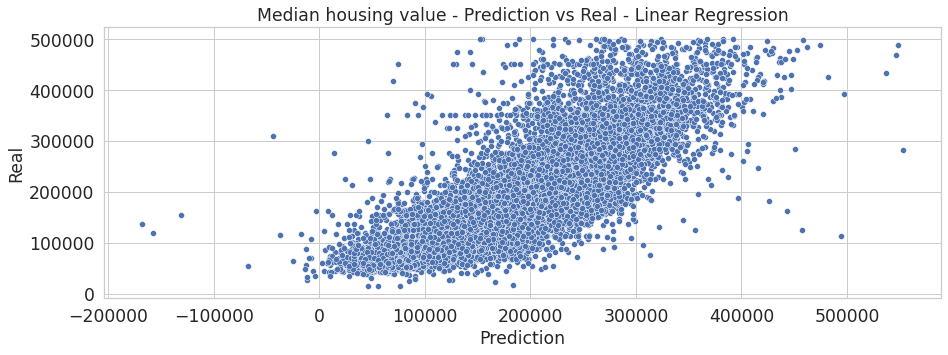

In [27]:
sns.scatterplot(x=y_train_pred_lin_reg, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real - Linear Regression')

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual - Linear Regression')

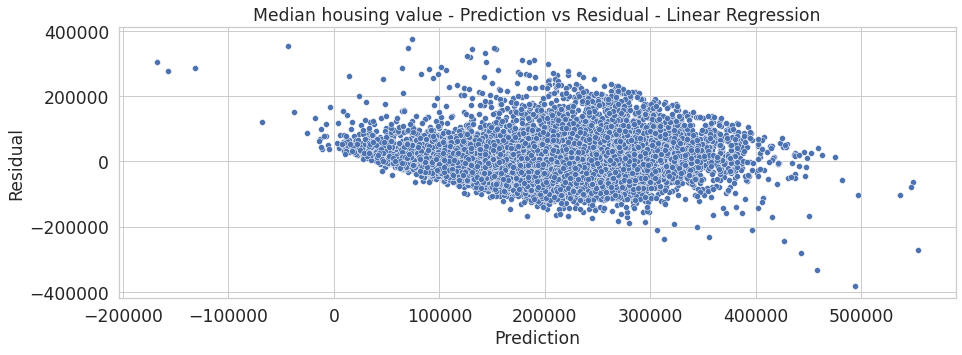

In [28]:
residual_lin_reg = y_train - y_train_pred_lin_reg

sns.scatterplot(x=y_train_pred_lin_reg, y=residual_lin_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual - Linear Regression')

<br/><br/>

#### **→ Decision Tree**

##### **Prediction**

In [29]:
y_train_pred_tree_reg = tree_reg.predict(X_train)

##### **Evaluation**

In [30]:
from sklearn.metrics import r2_score

tree_reg_r2 = r2_score(y_train, y_train_pred_tree_reg)
print(f'R² decision tree regression = {tree_reg_r2}')

R² decision tree regression = 1.0


In [31]:
from sklearn.metrics import mean_squared_error

tree_reg_rmse = mean_squared_error(y_train, y_train_pred_tree_reg, squared=False)
print(f'RMSE = {tree_reg_rmse}')

RMSE = 0.0


Wait, what!? No error at all? Could this model really be absolutely perfect? <br/>
Of course, it is much more likely that the model has badly <b>overfit</b> the data.

We'd better evaluate it by using <b style="color: #ff5757 !important">Cross-Validation</b>.

#### **Visual Analysis**

Text(0.5, 1.0, 'Median housing value - Prediction vs Real - Decision Tree Regression')

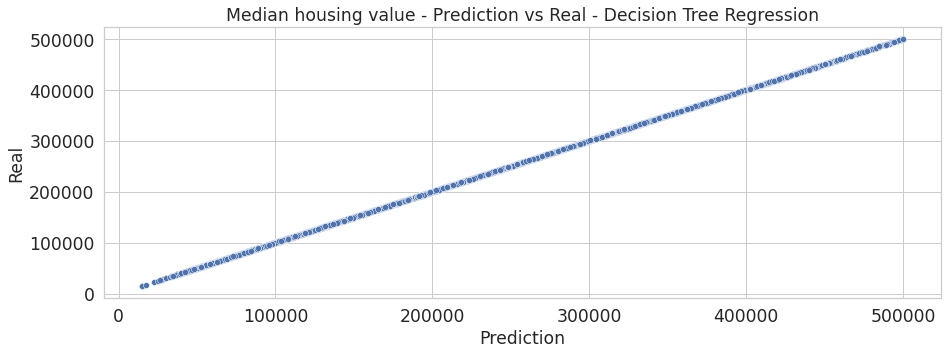

In [32]:
sns.scatterplot(x=y_train_pred_tree_reg, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('Real')
plt.title('Median housing value - Prediction vs Real - Decision Tree Regression')

Text(0.5, 1.0, 'Median housing value - Prediction vs Residual |')

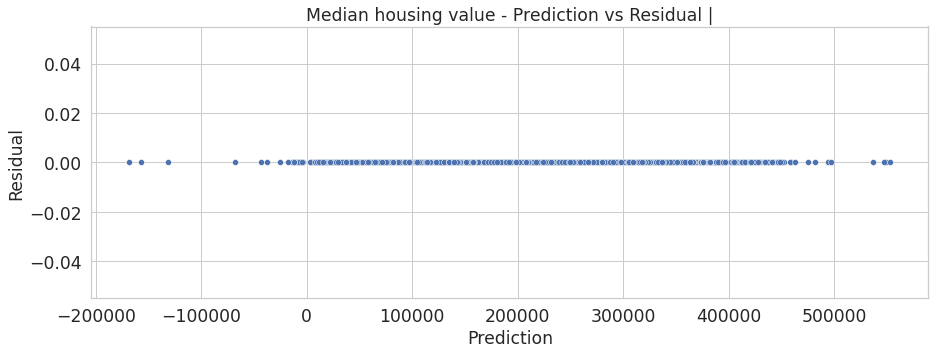

In [33]:
residual_tree_reg = y_train - y_train_pred_tree_reg

sns.scatterplot(x=y_train_pred_lin_reg, y=residual_tree_reg)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Median housing value - Prediction vs Residual |')

<h3 style="color: #ff5757 !important"><b>Cross-validation</b></h3>

<table align="left" class="dashed-box">
<tr>
    <td><span class='alt-tab'>alt tab</span></td>
    <td><b>Slides:</b> Model Validation</td>
</tr>
</table><br/><br/>

`sklearn.model_selection.cross_val_score` <br/>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

#### **→ Decision Tree**

The following code ***randomly splits*** (_no stratification_) the _training set_ into **10 folds**, then it trains and evaluates the Decision Tree model 10 times, picking a different fold (**validation set**) for evaluation every time and training on the other 9 folds (**train-dev set**). <br/>
The result is an _array_ containing the 10 evaluation scores.

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Scikit-Learn’s cross-validation features expect a <i>utility function</i> (<b>greater is better</b>) rather than a <i>cost function</i> (<i>lower is better</i>), so the <i>scoring function</i> is actually the <b>opposite of the MSE</b> (i.e., a negative value), which is why the preceding code computes <code>-scores</code> before calculating the square root.</td>
</tr>
</table><br/><br/>

In [35]:
from sklearn.model_selection import cross_val_score

tree_reg = DecisionTreeRegressor(random_state=42)
tree_neg_mse_scores = cross_val_score(tree_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

tree_rmse_scores = np.sqrt(-tree_neg_mse_scores)

In [36]:
# printing function
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [37]:
display_scores(tree_rmse_scores)

Scores: [67312.21998733 63446.60730038 61711.15328778 59770.34721942
 67189.86924835 65663.51428055 65171.43295147 61740.89561968
 61311.18030648 62164.20538362]
Mean: 63548.142558505526
Standard deviation: 2497.6453256697405


Now the Decision Tree **doesn’t look as good as it did earlier**. In fact, it seems to perform **worse than the Linear Regression model**: mean cross-validation RMSE: \\$63,548 against \\$58,146 (linear regression).

Notice that cross-validation allows you to get not only an estimate of the performance of your model, but also _a measure of_ **how precise this estimate is** (i.e., its **standard deviation**). <br/>
The Decision Tree has a score of approximately \\$63,548, generally ± \$2,497. <br/>
We _would not_ have this information if we just used **one validation set (hold-out strategy)**.

But cross-validation comes at the **cost of training the model several times**, so it is not always possible.

#### **→ Linear Regression**
Let's do the same with Linear regression and compare it with Decision Tree.

In [38]:
from sklearn.model_selection import cross_val_score

lin_reg = LinearRegression()
lin_neg_mse_scores = cross_val_score(lin_reg, X_train, y_train, cv=10, scoring='neg_mean_squared_error')

lin_rmse_scores = np.sqrt(-lin_neg_mse_scores)

In [39]:
display_scores(lin_rmse_scores)

Scores: [58883.49218279 55293.5735956  55181.52250607 57775.16025404
 60155.15922657 59588.9688012  57781.68607191 59995.21362185
 59923.51235138 59132.12479715]
Mean: 58371.04134085788
Standard deviation: 1757.914437100754


<br/>

That’s right: the Decision Tree model is **overfitting** so badly that it performs worse than the Linear Regression model:
- **Linear Regression:** \\$58,371 ± \$1,757
- **Decision Tree:** \\$63,548 ± \$2,497

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Before using the <b>mean cross-validate score</b> to compare both method, we <b>MUST</b> guarantee that they are using <b><i>exactly</i> the same folds</b> during the cross-validation.</td>
</tr>
<tr>
    <td></td>
    <td>This is true for the example above. When passing <i>the same integer number</i> to the <code>cross_val_score</code> without proving a target array <code>y</code> with <b>label/class</b>, the function will use <code>KFold</code> for cross-validation.</td>
<tr>
    <td></td>
    <td>Both executions of <code>KFold</code> generates the same folds.</td>
</tr>
</table><br/><br/>

<table align="left" class="dashed-box">
<tr>
    <td>⚠️</td>
    <td>Since we performed <b>stratified sampling</b> to build our training and testing set, it should be more indicated to consider the <b>Stratified k-Fold</b>.</td>
</tr>
<tr>
    <td></td>
    <td>However, as <code>cross_val_score</code> only consider <b>Stratified k-Fold</b> if the target target array <code>y</code> contains <b>labels/classes</b>, we should create our own cross-validation function capable of stratifying our training set by using a different variable from <code>y</code> --> <code>mean_income_group</code>.</td>
</tr>
</table><br/><br/>